In [2]:
import scipy.stats as stats
import numpy as np

# Specify parameters for test
n = 10
x_bar = 9.6
S = 2.5

# Specify CI 
confidence_level = 0.90

# Calculate degrees of freedom
df = n - 1

# Compute the t-critical value
t_crit = stats.t.ppf((1 + confidence_level) / 2, df)
SE = S / np.sqrt(n)

# Compute CI
lower_bound = x_bar - t_crit * SE
upper_bound = x_bar + t_crit * SE

# Output
print(t_crit)
print(f"90% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")

1.8331129326536335
90% Confidence Interval: (8.151, 11.049)


In [3]:
import scipy.stats as stats
import numpy as np

# Sample size: Number of observations in the sample.
n = 25
# Sample mean: Average of the sample values.
x_bar = 2.73
# Sample standard deviation: Measure of the spread of the sample data.
s = 2.6  # Changed to lowercase 's'
# Hypothesized population mean: The value we're comparing the sample mean to.
mu = 2.61
# Significance level: Probability of rejecting H0 when it's true.
alpha = 0.05
# Degrees of freedom: n - 1 for a one-sample t-test.
df = n - 1
# Standard Error: Estimate of the standard deviation of the sample mean's distribution.
SE = s / np.sqrt(n)  # Using lowercase 's'
# t-statistic: Measures the difference between the sample mean and the
# hypothesized population mean in units of standard error.
t_stat = (x_bar - mu) / SE
# Critical t-value: The threshold value for the t-statistic,
# determined by alpha and degrees of freedom.  We use 1 - alpha/2
# to get the upper tail for a two-tailed test.
t_crit = stats.t.ppf(1 - alpha / 2, df)

# Hypothesis testing: Compare the absolute value of the t-statistic
# to the critical t-value.
if abs(t_stat) > t_crit:
    # If the t-statistic is more extreme than the critical value,
    # we reject the null hypothesis.
    print(
        f"Reject H0: The sample mean is significantly different "
        f"from the population mean (t = {t_stat:.3f}, p < {alpha:.2f})"
    )
else:
    # Otherwise, we fail to reject the null hypothesis.
    print(
        f"Fail to Reject H0: No significant difference "
        f"(t = {t_stat:.3f}, p > {alpha:.2f})"
    )

Fail to Reject H0: No significant difference (t = 0.231, p > 0.05)


In [6]:
import scipy.stats as stats
import numpy as np

# Sample size: Number of observations in the sample.
n = 25
# Sample mean: Average of the sample values.
x_bar = 2.73
# Sample standard deviation: Measure of the spread of the sample data.
s = 2.6
# Hypothesized population mean: The value we're comparing the sample mean to.
mu = 2.61
# Significance level: Probability of rejecting H0 when it's true (Type I error).
alpha = 0.05
# Degrees of freedom: n - 1 for a one-sample t-test.
df = n - 1
# Standard Error: Estimate of the standard deviation of the sample mean's distribution.
SE = s / np.sqrt(n)
# t-statistic: Measures the difference between the sample mean and the
# hypothesized population mean in units of standard error.  This is the
# *same* calculation as in the critical value approach.
t_stat = (x_bar - mu) / SE

# Calculate the p-value for a two-tailed test.
# This is the *key difference* from the critical value approach.
# Instead of comparing t_stat to a critical value, we calculate the
# probability of observing a t-statistic *as extreme as or more extreme than*
# the one we calculated, *assuming the null hypothesis is true*.

# stats.t.cdf(t_stat, df) gives the cumulative probability up to t_stat.
# This is the area under the t-distribution curve to the *left* of t_stat.

# For a two-tailed test, we need to consider both tails of the distribution.
if t_stat < 0:
    # If t_stat is negative, the area to the left of t_stat represents
    # one tail of the p-value. We multiply by 2 to account for both tails.
    p_value = 2 * stats.t.cdf(t_stat, df)
else:
    # If t_stat is positive, the area to the left of t_stat is *not* the
    # tail we're interested in.  We want the area to the *right* of t_stat
    # (the upper tail).  We get this by subtracting the CDF from 1.
    # Again, we multiply by 2 for the two-tailed test.
    p_value = 2 * (1 - stats.t.cdf(t_stat, df))

# Alternative, more concise way using abs():
# p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
# This works because the t-distribution is symmetric.  Taking the absolute
# value of t_stat and then finding the area in the *right* tail (1 - CDF)
# is equivalent to finding the area in the left tail when t_stat is negative.

# Another alternative using the survival function (sf), which is 1 - CDF:
# p_value_sf = 2 * stats.t.sf(abs(t_stat), df)
# This is the most direct way to get the two-tailed p-value using scipy.stats.


# Hypothesis testing using the p-value:
# This is the decision rule based on the p-value.  It's conceptually
# different from the critical value approach, but leads to the same conclusion.
if p_value < alpha:
    # If the p-value is less than the significance level (alpha), we
    # reject the null hypothesis.  This means the observed data is
    # sufficiently unlikely under the null hypothesis.  The smaller the
    # p-value, the stronger the evidence against H0.
    print(
        f"Reject H0: The sample mean is significantly different "
        f"from the population mean (t = {t_stat:.3f}, p = {p_value:.3f})"
    )
else:
    # If the p-value is greater than or equal to alpha, we fail to
    # reject the null hypothesis.  This does *not* mean H0 is true,
    # just that we don't have enough evidence to reject it based on
    # this sample.
    print(
        f"Fail to Reject H0: No significant difference "
        f"(t = {t_stat:.3f}, p = {p_value:.3f})"
    )

# Comparison with the Critical Value Approach:

# * Critical Value Approach:
#   - We calculate a critical t-value (t_crit) based on alpha and df.
#   - We compare the *absolute value* of our calculated t-statistic (t_stat)
#     to t_crit.
#   - If |t_stat| > t_crit, we reject H0.
#   - This approach focuses on whether the test statistic falls within a
#     pre-defined "rejection region."

# * P-value Approach:
#   - We calculate the p-value, which is the probability of observing a
#     test statistic as extreme as or more extreme than the one we calculated,
#     assuming H0 is true.
#   - We compare the p-value directly to alpha.
#   - If p_value < alpha, we reject H0.
#   - This approach focuses on the *probability* of the observed data (or
#     more extreme data) given the null hypothesis.

# Both approaches are equivalent in terms of the decision (reject or fail to
# reject H0).  They will always lead to the same conclusion for a given set
# of data, alpha, and hypothesis test.  The p-value approach, however,
# provides more information:  the p-value itself, which quantifies the
# strength of the evidence against H0. A smaller p_value indicates stronger
# evidence.


Fail to Reject H0: No significant difference (t = 0.231, p = 0.819)


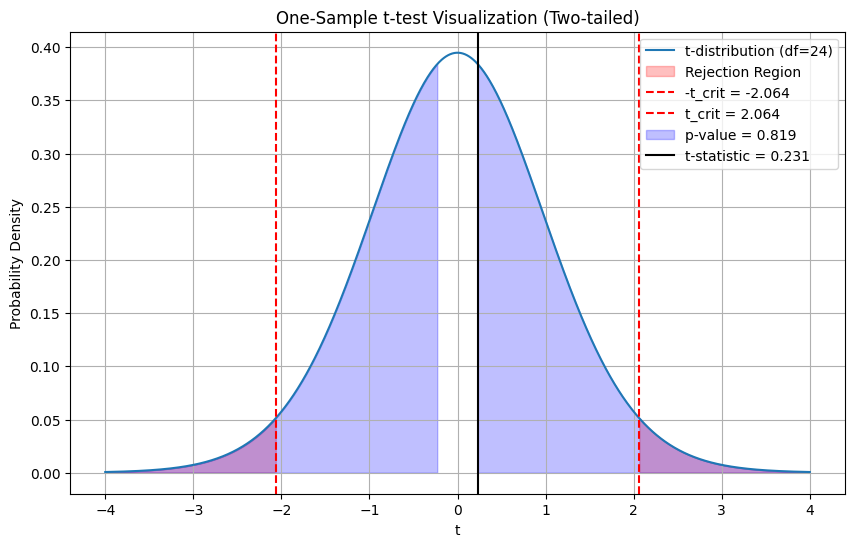

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Data and Parameters (using the same example as we used earlier) ---
n = 25       # Sample size
x_bar = 2.73   # Sample mean
s = 2.6      # Sample standard deviation
mu = 2.61    # Hypothesized population mean
alpha = 0.05   # Significance level
test_type = "two-tailed"  # "two-tailed", "left-tailed", or "right-tailed"

# --- Calculations (Explanined earlier) ---
df = n - 1
SE = s / np.sqrt(n)
t_stat = (x_bar - mu) / SE

# --- Plotting Setup (Usually no need to change this) ---
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)  # Create a range of t-values
plt.plot(x, stats.t.pdf(x, df), label=f't-distribution (df={df})')  # Plot the t-distribution

# --- Critical Value Visualization (Usually no need to change this) ---
if test_type == "two-tailed":
    t_crit = stats.t.ppf(1 - alpha / 2, df)
    # Shade rejection regions
    x_left = np.linspace(-4, -t_crit, 100)
    x_right = np.linspace(t_crit, 4, 100)
    plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.25, label='Rejection Region')
    plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.25)
    # Draw critical value lines
    plt.axvline(-t_crit, color='red', linestyle='--', label=f'-t_crit = {-t_crit:.3f}')
    plt.axvline(t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}')

elif test_type == "left-tailed":
    t_crit = stats.t.ppf(alpha, df)
    # Shade rejection region
    x_left = np.linspace(-4, t_crit, 100)
    plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.25, label='Rejection Region')
    # Draw critical value line
    plt.axvline(t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}')

elif test_type == "right-tailed":
    t_crit = stats.t.ppf(1 - alpha, df)
    #Shade rejection region
    x_right = np.linspace(t_crit, 4, 100)
    plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.25, label='Rejection Region')
    # Draw critical value line.
    plt.axvline(t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}')


# --- p-value Visualization ---
if test_type == "two-tailed":
    if t_stat < 0:
        p_value = 2 * stats.t.cdf(t_stat, df)
        #Shade p-value area
        x_shade = np.linspace(-4, t_stat, 100)
        plt.fill_between(x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25, label=f'p-value = {p_value:.3f}')
        x_shade_right = np.linspace(-t_stat, 4, 100)
        plt.fill_between(x_shade_right, stats.t.pdf(x_shade_right,df), color='blue', alpha=0.25)
    else:
        p_value = 2 * (1 - stats.t.cdf(t_stat, df))
        #Shade p-value area.
        x_shade = np.linspace(t_stat, 4, 100)
        plt.fill_between(x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25, label=f'p-value = {p_value:.3f}')
        x_shade_left = np.linspace(-4, -t_stat, 100)
        plt.fill_between(x_shade_left, stats.t.pdf(x_shade_left,df), color='blue', alpha=0.25)
elif test_type == "left-tailed":
    p_value = stats.t.cdf(t_stat, df)
    # Shade the p-value area.
    x_shade = np.linspace(-4, t_stat, 100)
    plt.fill_between(x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25, label=f'p-value = {p_value:.3f}')

elif test_type == "right-tailed":
    p_value = 1- stats.t.cdf(t_stat, df)
    #Shade the p-value area.
    x_shade = np.linspace(t_stat, 4, 100)
    plt.fill_between(x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25, label=f'p-value = {p_value:.3f}')

# --- Plotting t-statistic (Usually no need to change this) ---
plt.axvline(t_stat, color='black', linestyle='-', label=f't-statistic = {t_stat:.3f}')

# --- Final Plot Adjustments (Usually no need to change this) ---
plt.title(f'One-Sample t-test Visualization ({test_type.capitalize()})')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

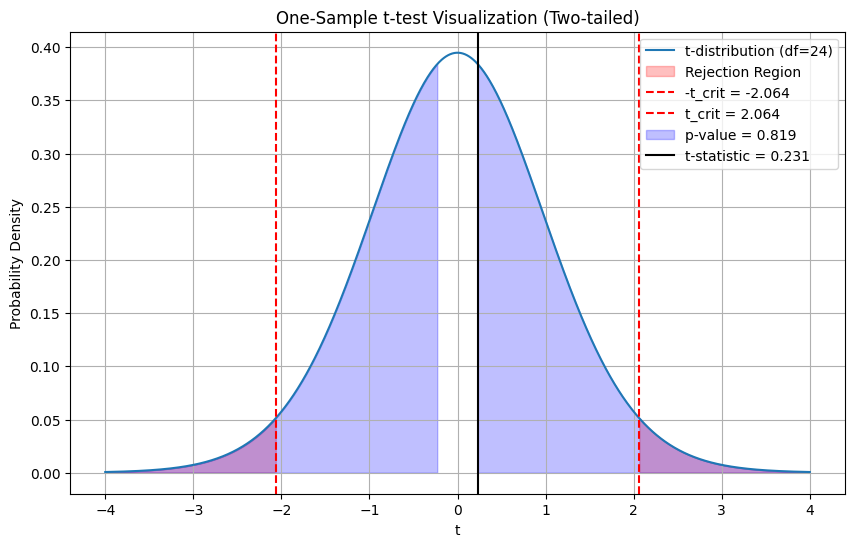

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Data and Parameters (We have done this earlier!) ---
n = 25  # Sample size
x_bar = 2.73  # Sample mean
s = 2.6  # Sample standard deviation
mu = 2.61  # Hypothesized population mean
alpha = 0.05  # Significance level
test_type = "two-tailed"  # "two-tailed", "left-tailed", or "right-tailed"

# --- Calculations (We have done this earlier!) ---
df = n - 1
SE = s / np.sqrt(n)
t_stat = (x_bar - mu) / SE

# --- Plotting Setup (Usually no need to change this) ---
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)  # Create a range of t-values
plt.plot(x, stats.t.pdf(x, df), label=f't-distribution (df={df})')

# --- Critical Value Visualization (Usually no need to change this) ---
if test_type == "two-tailed":
    t_crit = stats.t.ppf(1 - alpha / 2, df)
    # Shade rejection regions
    x_left = np.linspace(-4, -t_crit, 100)
    x_right = np.linspace(t_crit, 4, 100)
    plt.fill_between(
        x_left, stats.t.pdf(x_left, df), color='red', alpha=0.25,
        label='Rejection Region'
    )
    plt.fill_between(
        x_right, stats.t.pdf(x_right, df), color='red', alpha=0.25
    )
    # Draw critical value lines
    plt.axvline(
        -t_crit, color='red', linestyle='--',
        label=f'-t_crit = {-t_crit:.3f}'
    )
    plt.axvline(
        t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}'
    )

elif test_type == "left-tailed":
    t_crit = stats.t.ppf(alpha, df)
    # Shade rejection region
    x_left = np.linspace(-4, t_crit, 100)
    plt.fill_between(
        x_left, stats.t.pdf(x_left, df), color='red', alpha=0.25,
        label='Rejection Region'
    )
    # Draw critical value line
    plt.axvline(
        t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}'
    )

elif test_type == "right-tailed":
    t_crit = stats.t.ppf(1 - alpha, df)
    # Shade rejection region
    x_right = np.linspace(t_crit, 4, 100)
    plt.fill_between(
        x_right, stats.t.pdf(x_right, df), color='red', alpha=0.25,
        label='Rejection Region'
    )
    # Draw critical value line.
    plt.axvline(
        t_crit, color='red', linestyle='--', label=f't_crit = {t_crit:.3f}'
    )


# --- p-value Visualization (Usually no need to change this) ---
if test_type == "two-tailed":
    if t_stat < 0:
        p_value = 2 * stats.t.cdf(t_stat, df)
        # Shade p-value area
        x_shade = np.linspace(-4, t_stat, 100)
        plt.fill_between(
            x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
            label=f'p-value = {p_value:.3f}'
        )
        x_shade_right = np.linspace(-t_stat, 4, 100)
        plt.fill_between(
            x_shade_right, stats.t.pdf(x_shade_right, df),
            color='blue', alpha=0.25
        )
    else:
        p_value = 2 * (1 - stats.t.cdf(t_stat, df))
        # Shade p-value area.
        x_shade = np.linspace(t_stat, 4, 100)
        plt.fill_between(
            x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
            label=f'p-value = {p_value:.3f}'
        )
        x_shade_left = np.linspace(-4, -t_stat, 100)
        plt.fill_between(
            x_shade_left, stats.t.pdf(x_shade_left, df),
            color='blue', alpha=0.25
        )
elif test_type == "left-tailed":
    p_value = stats.t.cdf(t_stat, df)
    # Shade the p-value area.
    x_shade = np.linspace(-4, t_stat, 100)
    plt.fill_between(
        x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
        label=f'p-value = {p_value:.3f}'
    )

elif test_type == "right-tailed":
    p_value = 1 - stats.t.cdf(t_stat, df)
    # Shade the p-value area.
    x_shade = np.linspace(t_stat, 4, 100)
    plt.fill_between(
        x_shade, stats.t.pdf(x_shade, df), color='blue', alpha=0.25,
        label=f'p-value = {p_value:.3f}'
    )

# --- Plotting t-statistic (Usually no need to change this) ---
plt.axvline(
    t_stat, color='black', linestyle='-', label=f't-statistic = {t_stat:.3f}'
)

# --- Final Plot Adjustments (Usually no need to change this) ---
plt.title(f'One-Sample t-test Visualization ({test_type.capitalize()})')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()